Ying Lin's Milestone 2

## Importing libraries and dataset

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [23]:
test_df = pd.read_csv("test_reduced.csv")
train_df = pd.read_csv("train_reduced.csv")

In [24]:
print (f"The shape of train_df is {train_df.shape}")
train_df.head()
# first column (index) was read as a column
train_df = train_df.iloc[:,1:]
train_df.head()

The shape of train_df is (506858, 16)


,srch_id,visitor_location_country_id,visitor_hist_adr_usd,prop_id,prop_country_id,prop_review_score,price_usd,prop_log_historical_price,date_time,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_destination_id,srch_room_count
0,47,100,180.75,6618,137,4.0,118.94,4.78,2013-01-14 22:28:43,6,3,1,1,13901,1
1,47,100,180.75,11747,137,4.5,113.86,5.34,2013-01-14 22:28:43,6,3,1,1,13901,1
2,47,100,180.75,18311,137,4.0,129.10,5.44,2013-01-14 22:28:43,6,3,1,1,13901,1
3,47,100,180.75,19599,137,4.0,94.54,5.03,2013-01-14 22:28:43,6,3,1,1,13901,1
4,47,100,180.75,24002,137,4.5,185.02,5.60,2013-01-14 22:28:43,6,3,1,1,13901,1


In [25]:
train_df.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_adr_usd',
       'prop_id', 'prop_country_id', 'prop_review_score', 'price_usd',
       'prop_log_historical_price', 'date_time', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_destination_id', 'srch_room_count'],
      dtype='object')

### Focus: How do hotel price trends change over time? How do price trends change based on the location of the hotel?

In [26]:
train_df["date_time"] = pd.to_datetime(train_df["date_time"])

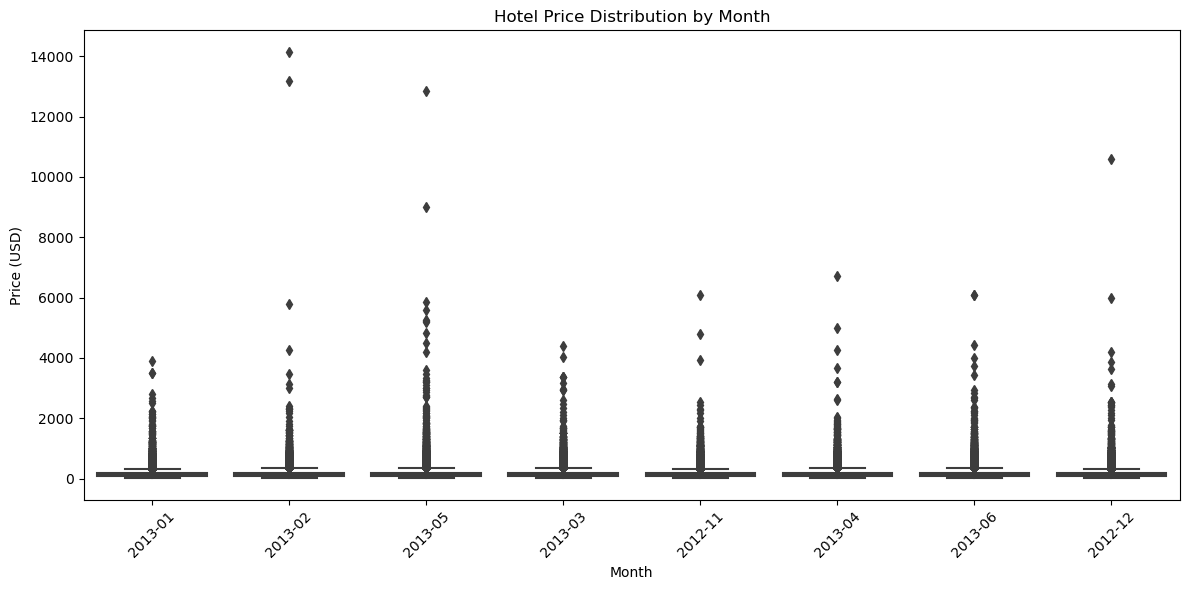

In [27]:
train_df["year_month"] = train_df["date_time"].dt.to_period("M")
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x="year_month", y="price_usd")

plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.title("Hotel Price Distribution by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

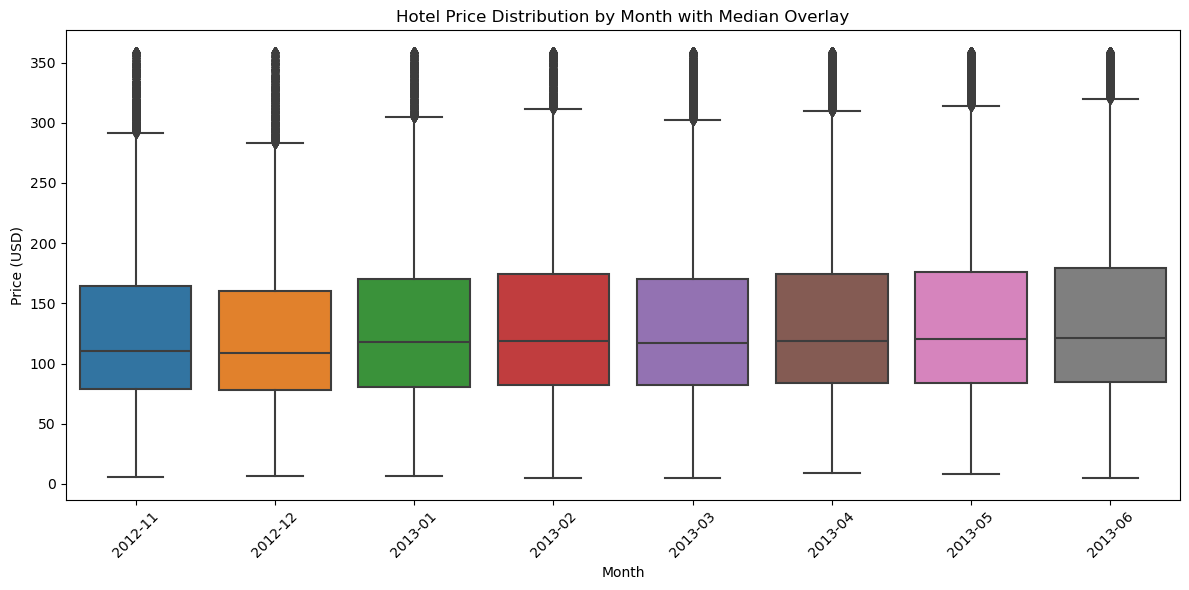

In [28]:
p95 = train_df["price_usd"].quantile(0.95)
filtered_df = train_df[train_df["price_usd"] <= p95].copy()

filtered_df["year_month"] = filtered_df["date_time"].dt.to_period("M").astype(str)
ordered_months = sorted(filtered_df["year_month"].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df,
    x="year_month",
    y="price_usd",
    order=ordered_months
)

plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.title("Hotel Price Distribution by Month with Median Overlay")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


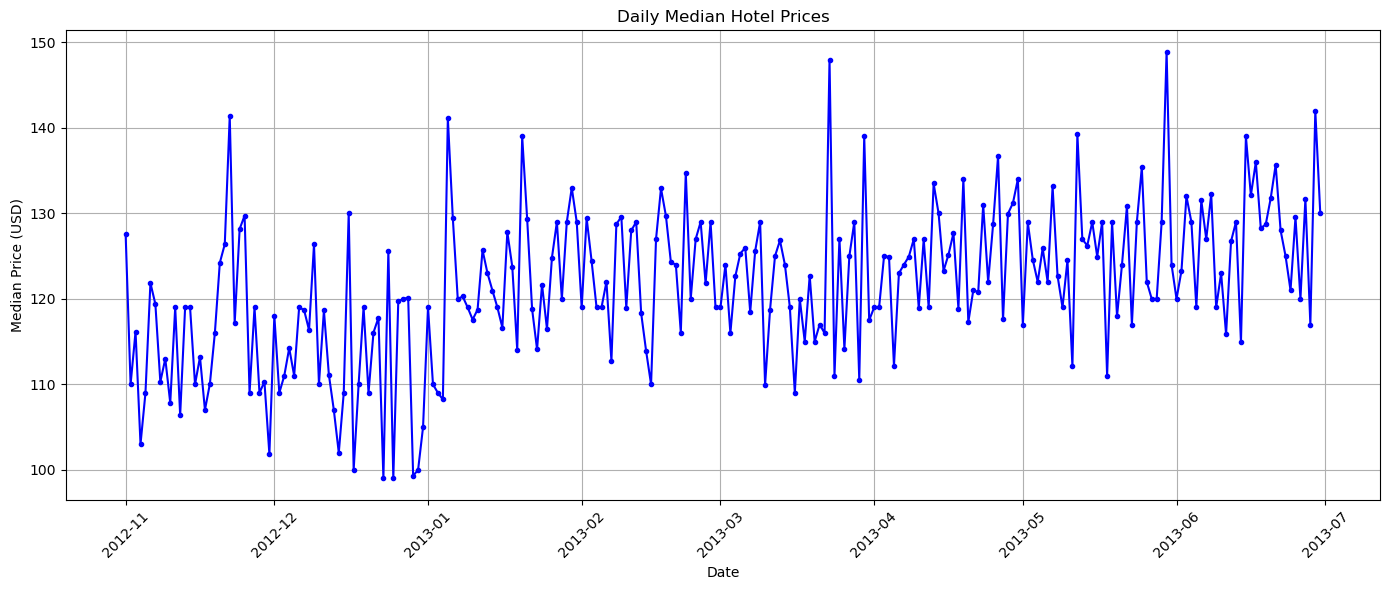

In [29]:
train_df["date"] = train_df["date_time"].dt.date
daily_median = train_df.groupby("date")["price_usd"].median().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_median["date"], daily_median["price_usd"], color='blue', marker='.', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Median Price (USD)")
plt.title("Daily Median Hotel Prices")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Does there exist colinearity between the covariates?

In [30]:
train_df[["visitor_hist_adr_usd",
         "prop_review_score", "prop_log_historical_price",
          "srch_length_of_stay", 'srch_booking_window', 
          'srch_adults_count', 'srch_children_count',
          'srch_room_count', "price_usd"]].corr()

,visitor_hist_adr_usd,prop_review_score,prop_log_historical_price,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,price_usd
visitor_hist_adr_usd,1.000000,0.046059,0.027308,0.076654,0.103374,0.028143,0.064062,0.009307,0.183190
prop_review_score,0.046059,1.000000,0.122384,-0.001431,0.012994,0.028337,0.012869,0.028899,0.176009
prop_log_historical_price,0.027308,0.122384,1.000000,0.036171,0.061831,-0.004357,-0.026269,-0.009942,0.126475
srch_length_of_stay,0.076654,-0.001431,0.036171,1.000000,0.156515,0.039670,0.045024,0.006089,0.093158
srch_booking_window,0.103374,0.012994,0.061831,0.156515,1.000000,0.166654,0.118994,0.010247,0.112162
srch_adults_count,0.028143,0.028337,-0.004357,0.039670,0.166654,1.000000,0.059961,0.486858,0.065193
srch_children_count,0.064062,0.012869,-0.026269,0.045024,0.118994,0.059961,1.000000,0.095050,0.053364
srch_room_count,0.009307,0.028899,-0.009942,0.006089,0.010247,0.486858,0.095050,1.000000,0.017060
price_usd,0.183190,0.176009,0.126475,0.093158,0.112162,0.065193,0.053364,0.017060,1.000000


No obvious correlation between covariates. 

Notable Entries:
- The number of adult counts have a 0.487 correlation with number of rooms requested.

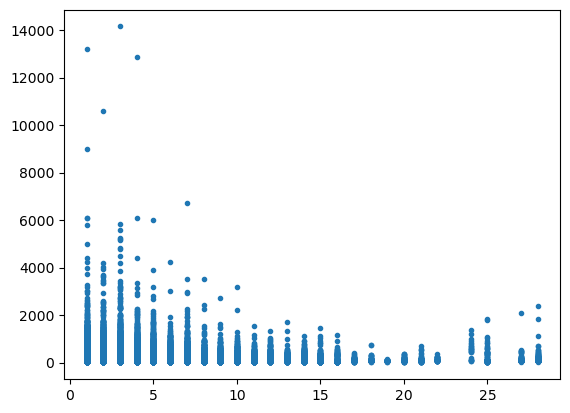

In [31]:
plt.plot(train_df["srch_length_of_stay"], train_df["price_usd"], ".")

It seems like price_usd is not the total price, but the price per room. Since the right tail is relatively even while there is some variance with individuals who searched for 1-3 rooms. What may have caused the high variance in prices for the observations where 1 room was requests? What causes differences in high priced rooms?

#### Exploring the impact of location on price

In [32]:
expensive_rooms = train_df[(train_df["prop_log_historical_price"] > train_df["prop_log_historical_price"].quantile(0.8))]
cheap_rooms = train_df[(train_df["prop_log_historical_price"] < train_df["prop_log_historical_price"].quantile(0.2))]
print (f"There are {expensive_rooms.shape[0]} observations with prices above 75th percentile.")
print (f"There are {cheap_rooms.shape[0]} observations with prices below 25th percentile.")

There are 101324 observations with prices above 75th percentile.
There are 101134 observations with prices below 25th percentile.


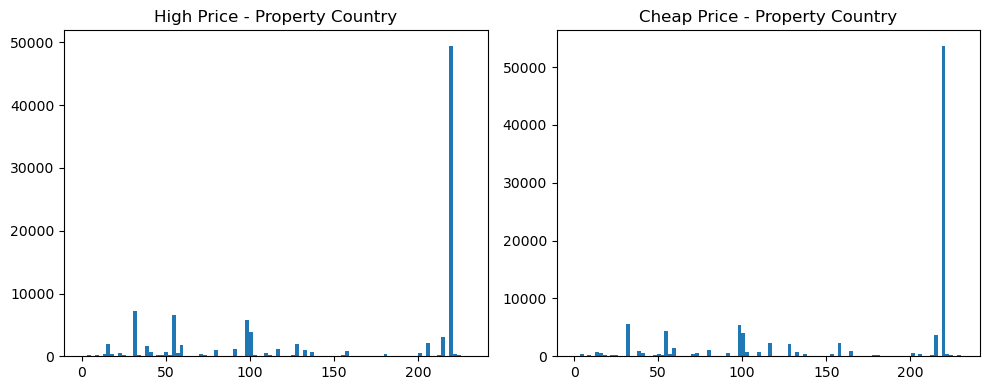

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(expensive_rooms["prop_country_id"], bins = 100)
axs[0].set_title("High Price - Property Country")

axs[1].hist(cheap_rooms["prop_country_id"], bins = 100)
axs[1].set_title("Cheap Price - Property Country")

plt.tight_layout()
plt.show()

In [34]:
hotel_counts = train_df.groupby("prop_country_id")["prop_id"].nunique()
hotel_counts.sort_values(ascending=False)

prop_country_id
219    32340
31      7081
55      4807
99      4688
215     3281
       ...  
226        5
19         5
184        3
165        2
208        2
Name: prop_id, Length: 156, dtype: int64

In [35]:
# What are the historcially cheaper locations and where are the more expensive locations?
exp_counts = expensive_rooms["prop_country_id"].value_counts()
cheap_counts = cheap_rooms["prop_country_id"].value_counts()
normalized_exp = (exp_counts / hotel_counts).dropna()
normalized_cheap = (cheap_counts / hotel_counts).dropna()
ratio = (normalized_exp / normalized_cheap).dropna()

extreme_ratios = ratio[(ratio > 4) | (ratio < 0.25)]
extreme_ratios = pd.DataFrame(extreme_ratios.sort_values())

print(extreme_ratios)

                         0
prop_country_id           
106               0.037736
229               0.054187
91                0.075000
222               0.076923
154               0.085938
182               0.088889
44                0.111111
164               0.111732
102               0.137931
11                0.140351
10                0.187500
140               0.200000
158               0.236414
113               4.300000
63                4.714286
97                4.800000
124               5.000000
205               5.002597
137               5.828125
169               7.500000
127               7.758621
189               8.000000
119               8.444444
27                9.222222
136              10.000000
65               10.000000
155              12.000000
186              14.400000
20               15.400000
214              19.250000
40               21.333333
80               21.678571
156              22.500000
30               24.000000
96               79.000000


If the ratio is high, that means that there are more expensive hotels (above 80th percentile for log mean historical price) than cheap hotels (below 20th percentile for log mean historical price) in that location. Therefore, it may be crucial to convert the top 10 and the lower 10 countries into dummy variables in the linear regression stage and/or conduct a causal analysis of where being in these countries causes prices to increase. From the data description, we learned that different countries have different conventions regarding displaying taxes and fees and the value may be per night or for the whole stay. Therefore, could these countries be displaying their prices as a total value rather than price per night?

In [36]:
high_price = train_df.loc[train_df["price_usd"] > train_df["price_usd"].quantile(0.9)]
high_price[["prop_country_id"]].value_counts()

prop_country_id
219                22081
55                  4237
31                  3507
99                  2890
220                 1959
                   ...  
208                    1
128                    1
10                     1
124                    1
46                     1
Name: count, Length: 138, dtype: int64

It seems interesting that the price outliers does not correspond with countries that have high or low price ratios. 

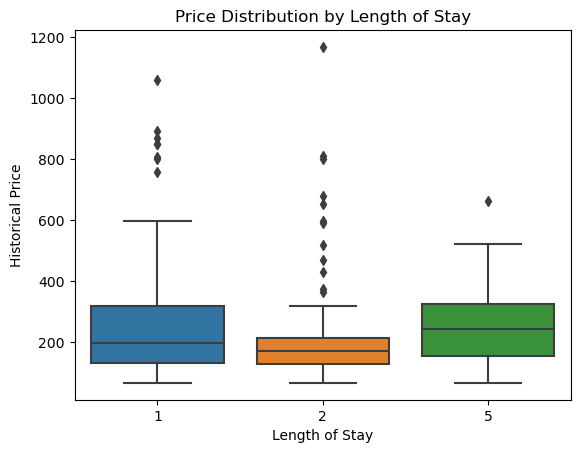

In [37]:
country_code = 30
country_price = train_df.loc[train_df["prop_country_id"] == country_code]

sns.boxplot(data=country_price, x="srch_length_of_stay", y="price_usd")
plt.title("Price Distribution by Length of Stay")
plt.xlabel("Length of Stay")
plt.ylabel("Historical Price")
plt.show()

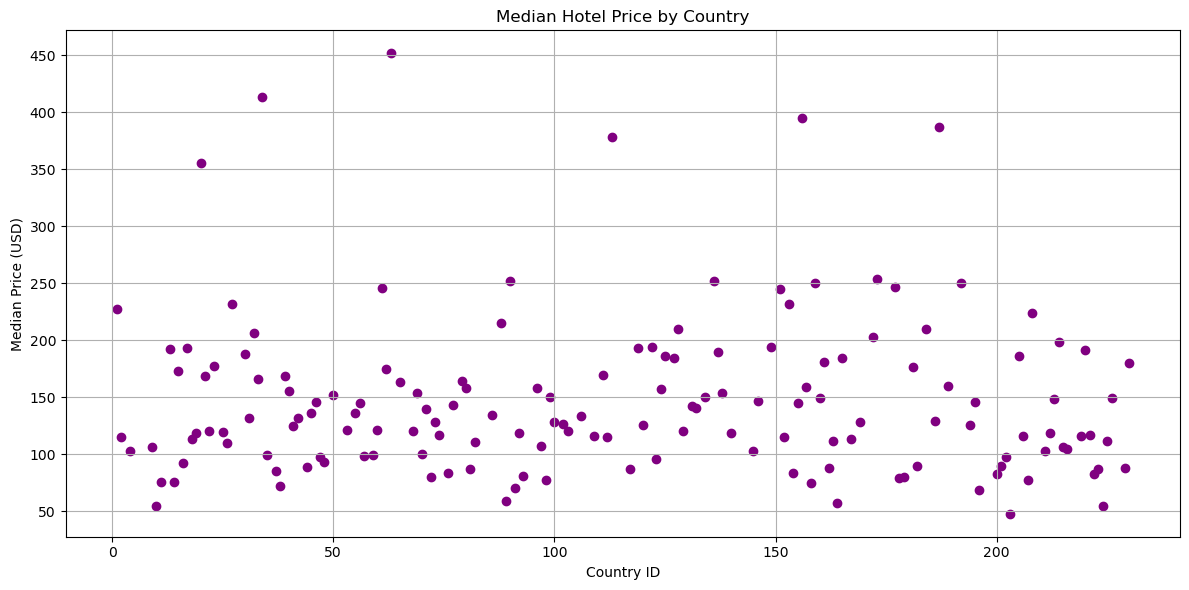

In [38]:
country_medians = (train_df.groupby("prop_country_id")["price_usd"].median().reset_index()
                   .rename(columns={"price_usd": "median_price"})
                   .set_index('prop_country_id')
)

plt.figure(figsize=(12, 6))
plt.scatter(country_medians.index, country_medians["median_price"], color='purple')

plt.xlabel("Country ID")
plt.ylabel("Median Price (USD)")
plt.title("Median Hotel Price by Country")
plt.grid(True)
plt.tight_layout()
plt.show()

When we aggregate based on country, it seems relatively consistent, so if we include country in our regression as a control, we can account for the fundamental differences between the various countries.

In [40]:
hist_price_P75 = train_df['prop_log_historical_price'].quantile(0.75)
hist_price_P25 = train_df['prop_log_historical_price'].quantile(0.25)

histcountry_medians = (train_df.groupby("prop_country_id")["prop_log_historical_price"].median().reset_index()
                   .rename(columns={"prop_log_historical_price": "median_hist_price"})
                   .set_index('prop_country_id')
)

train_df['hist_med_price_75th'] = train_df['prop_country_id'].map(
    lambda x: histcountry_medians.loc[x, 'median_hist_price'] > hist_price_P75 
    if x in histcountry_medians.index else False
)

train_df['hist_med_price_25th'] = train_df['prop_country_id'].map(
    lambda x: histcountry_medians.loc[x, 'median_hist_price'] < hist_price_P25 
    if x in histcountry_medians.index else False
)


train_df['hist_med_price_75th'] = train_df['hist_med_price_75th'].astype(int)
train_df['hist_med_price_25th'] = train_df['hist_med_price_25th'].astype(int)

In [41]:
train_df.head()

,srch_id,visitor_location_country_id,visitor_hist_adr_usd,prop_id,prop_country_id,prop_review_score,price_usd,prop_log_historical_price,date_time,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_destination_id,srch_room_count,year_month,date,hist_med_price_75th,hist_med_price_25th
0,47,100,180.75,6618,137,4.0,118.94,4.78,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,1,0
1,47,100,180.75,11747,137,4.5,113.86,5.34,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,1,0
2,47,100,180.75,18311,137,4.0,129.10,5.44,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,1,0
3,47,100,180.75,19599,137,4.0,94.54,5.03,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,1,0
4,47,100,180.75,24002,137,4.5,185.02,5.60,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,1,0


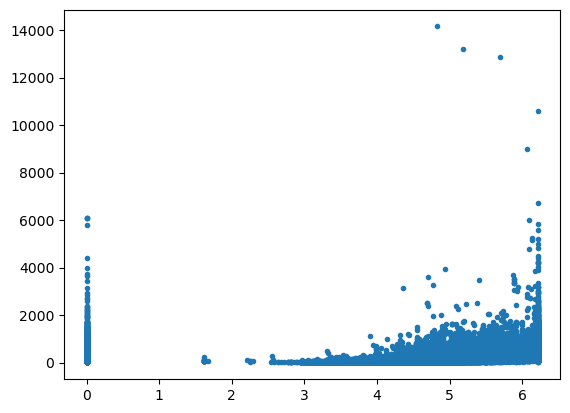

In [ ]:
plt.plot(train_df["prop_log_historical_price"], train_df["price_usd"], ".")

# Analysis Method: Checking Best Performing Prediction Model on Validation Set Using MSE -- Using Backward Selection

In [44]:
train_df.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_adr_usd',
       'prop_id', 'prop_country_id', 'prop_review_score', 'price_usd',
       'prop_log_historical_price', 'date_time', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_destination_id', 'srch_room_count', 'year_month', 'date',
       'hist_med_price_75th', 'hist_med_price_25th'],
      dtype='object')

In [48]:
complete_list = ['visitor_hist_adr_usd', 'prop_review_score',
                 'prop_log_historical_price', 'srch_length_of_stay',
                 'srch_booking_window', 'srch_adults_count', 
                 'srch_children_count','srch_room_count', 
                 'hist_med_price_75th', 'hist_med_price_25th']

In [45]:
hist_price_P75 = test_df['prop_log_historical_price'].quantile(0.75)
hist_price_P25 = test_df['prop_log_historical_price'].quantile(0.25)

histcountry_medians = (test_df.groupby("prop_country_id")["prop_log_historical_price"].median().reset_index()
                   .rename(columns={"prop_log_historical_price": "median_hist_price"})
                   .set_index('prop_country_id')
)

test_df['hist_med_price_75th'] = test_df['prop_country_id'].map(
    lambda x: histcountry_medians.loc[x, 'median_hist_price'] > hist_price_P75 
    if x in histcountry_medians.index else False
)

test_df['hist_med_price_25th'] = test_df['prop_country_id'].map(
    lambda x: histcountry_medians.loc[x, 'median_hist_price'] < hist_price_P25 
    if x in histcountry_medians.index else False
)


test_df['hist_med_price_75th'] = test_df['hist_med_price_75th'].astype(int)
test_df['hist_med_price_25th'] = test_df['hist_med_price_25th'].astype(int)

In [73]:
def fitModel (features):
    X_train = sm.add_constant(train_df[features])
    y_train = train_df["price_usd"]
    X_test = sm.add_constant(test_df[features])
    y_test = test_df["price_usd"]
    model = sm.OLS(y_train, X_train).fit()
    test_mse = np.sqrt(((y_test - model.predict(X_test)) ** 2).sum())
    return {"Model": model, "Test_MSE": test_mse}

def backwardSelection ():
    best_features = complete_list.copy()

    # Full model
    best_model_info = fitModel(best_features)
    best_mse = best_model_info["Test_MSE"]

    decreasing_mse = True
    #print (len(best_features))
    while ((decreasing_mse) & (len(best_features) > 1)):
        #print ("here")
        mse_candidates = []

        for feature in best_features:
            temp_features = best_features.copy()
            temp_features.remove(feature)
            #print("Trying", temp_features)
            model_info = fitModel(temp_features)
            mse_candidates.append((model_info["Test_MSE"], feature, model_info))
            #print ("Test MSE for this is", model_info["Test_MSE"])

        mse_candidates.sort()
        #print ("Sorted MSE List", mse_candidates[0], mse_candidates[1])
        candidate_mse, feature_to_remove, candidate_model_info = mse_candidates[0]

        if candidate_mse < best_mse:
            best_mse = candidate_mse
            best_features.remove(feature_to_remove)
            best_model_info = candidate_model_info
        else:
            decreasing_mse = False

    return best_model_info, best_features


In [74]:
best_model, best_features = backwardSelection()

In [75]:
best_model["Model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4617.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        01:43:36   Log-Likelihood:            -3.1713e+06
No. Observations:              506858   AIC:                         6.343e+06
Df Residuals:                  506849   BIC:                         6.343e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        62.8342      0.662     94.848      0.000      61.536      64.133
visitor_hist_adr_usd          0.1924      0.002    116.420      0.000       0.189       0.196
prop_log_historical_price     7.9941      0.098     81.830      0.000       7.803       8.186
srch_length_of_stay           3.9480      0.090     43.725      0.000       3.771       4.125
srch_booking_window           0.1854      0.004     52.716      0.000       0.178       0.192
srch_children_count           7.2179      0.301     23.991      0.000       6.628       7.808
srch_room_count               2.9106      0.296      9.820      0.000       2.330       3.492
hist_med_price_75th          57.5722      0.977     58.950      0.000      55.658      59.486
hist_med_price_25th         -33.5605      2.350    -14.282      0.000     -38.166     -28.955
==============================================================================
Omnibus:                  1018525.360   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      22795649823.428
Skew:                          15.684   Prob(JB):                         0.00
Kurtosis:                    1041.462   Cond. No.                     2.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
partial_list = ['visitor_hist_adr_usd', 'prop_review_score',
                 'prop_log_historical_price', 'srch_length_of_stay',
                 'srch_booking_window', 'srch_adults_count', 
                 'srch_children_count','srch_room_count']
fullModel = fitModel(partial_list)

In [77]:
fullModel["Model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6005.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        01:45:00   Log-Likelihood:            -3.1662e+06
No. Observations:              506858   AIC:                         6.332e+06
Df Residuals:                  506849   BIC:                         6.333e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.4854      0.849     -2.926      0.003      -4.150      -0.821
visitor_hist_adr_usd          0.1910      0.002    116.860      0.000       0.188       0.194
prop_review_score            18.0594      0.158    114.151      0.000      17.749      18.369
prop_log_historical_price     7.0035      0.097     72.013      0.000       6.813       7.194
srch_length_of_stay           4.1997      0.089     47.042      0.000       4.025       4.375
srch_booking_window           0.1668      0.004     47.144      0.000       0.160       0.174
srch_adults_count             6.7110      0.214     31.376      0.000       6.292       7.130
srch_children_count           6.9191      0.298     23.234      0.000       6.335       7.503
srch_room_count              -3.4552      0.337    -10.259      0.000      -4.115      -2.795
==============================================================================
Omnibus:                  1034947.647   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      25247558260.206
Skew:                          16.277   Prob(JB):                         0.00
Kurtosis:                    1095.898   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
train_df[complete_list].corr()

,visitor_hist_adr_usd,prop_review_score,prop_log_historical_price,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,hist_med_price_75th,hist_med_price_25th
visitor_hist_adr_usd,1.000000,0.046059,0.027308,0.076654,0.103374,0.028143,0.064062,0.009307,0.072737,-0.011824
prop_review_score,0.046059,1.000000,0.122384,-0.001431,0.012994,0.028337,0.012869,0.028899,0.009728,-0.030576
prop_log_historical_price,0.027308,0.122384,1.000000,0.036171,0.061831,-0.004357,-0.026269,-0.009942,0.050774,-0.040824
srch_length_of_stay,0.076654,-0.001431,0.036171,1.000000,0.156515,0.039670,0.045024,0.006089,0.051186,0.027078
srch_booking_window,0.103374,0.012994,0.061831,0.156515,1.000000,0.166654,0.118994,0.010247,0.026691,0.006875
srch_adults_count,0.028143,0.028337,-0.004357,0.039670,0.166654,1.000000,0.059961,0.486858,-0.012346,-0.000264
srch_children_count,0.064062,0.012869,-0.026269,0.045024,0.118994,0.059961,1.000000,0.095050,0.000651,-0.016400
srch_room_count,0.009307,0.028899,-0.009942,0.006089,0.010247,0.486858,0.095050,1.000000,-0.010853,0.003998
hist_med_price_75th,0.072737,0.009728,0.050774,0.051186,0.026691,-0.012346,0.000651,-0.010853,1.000000,-0.014361
hist_med_price_25th,-0.011824,-0.030576,-0.040824,0.027078,0.006875,-0.000264,-0.016400,0.003998,-0.014361,1.000000


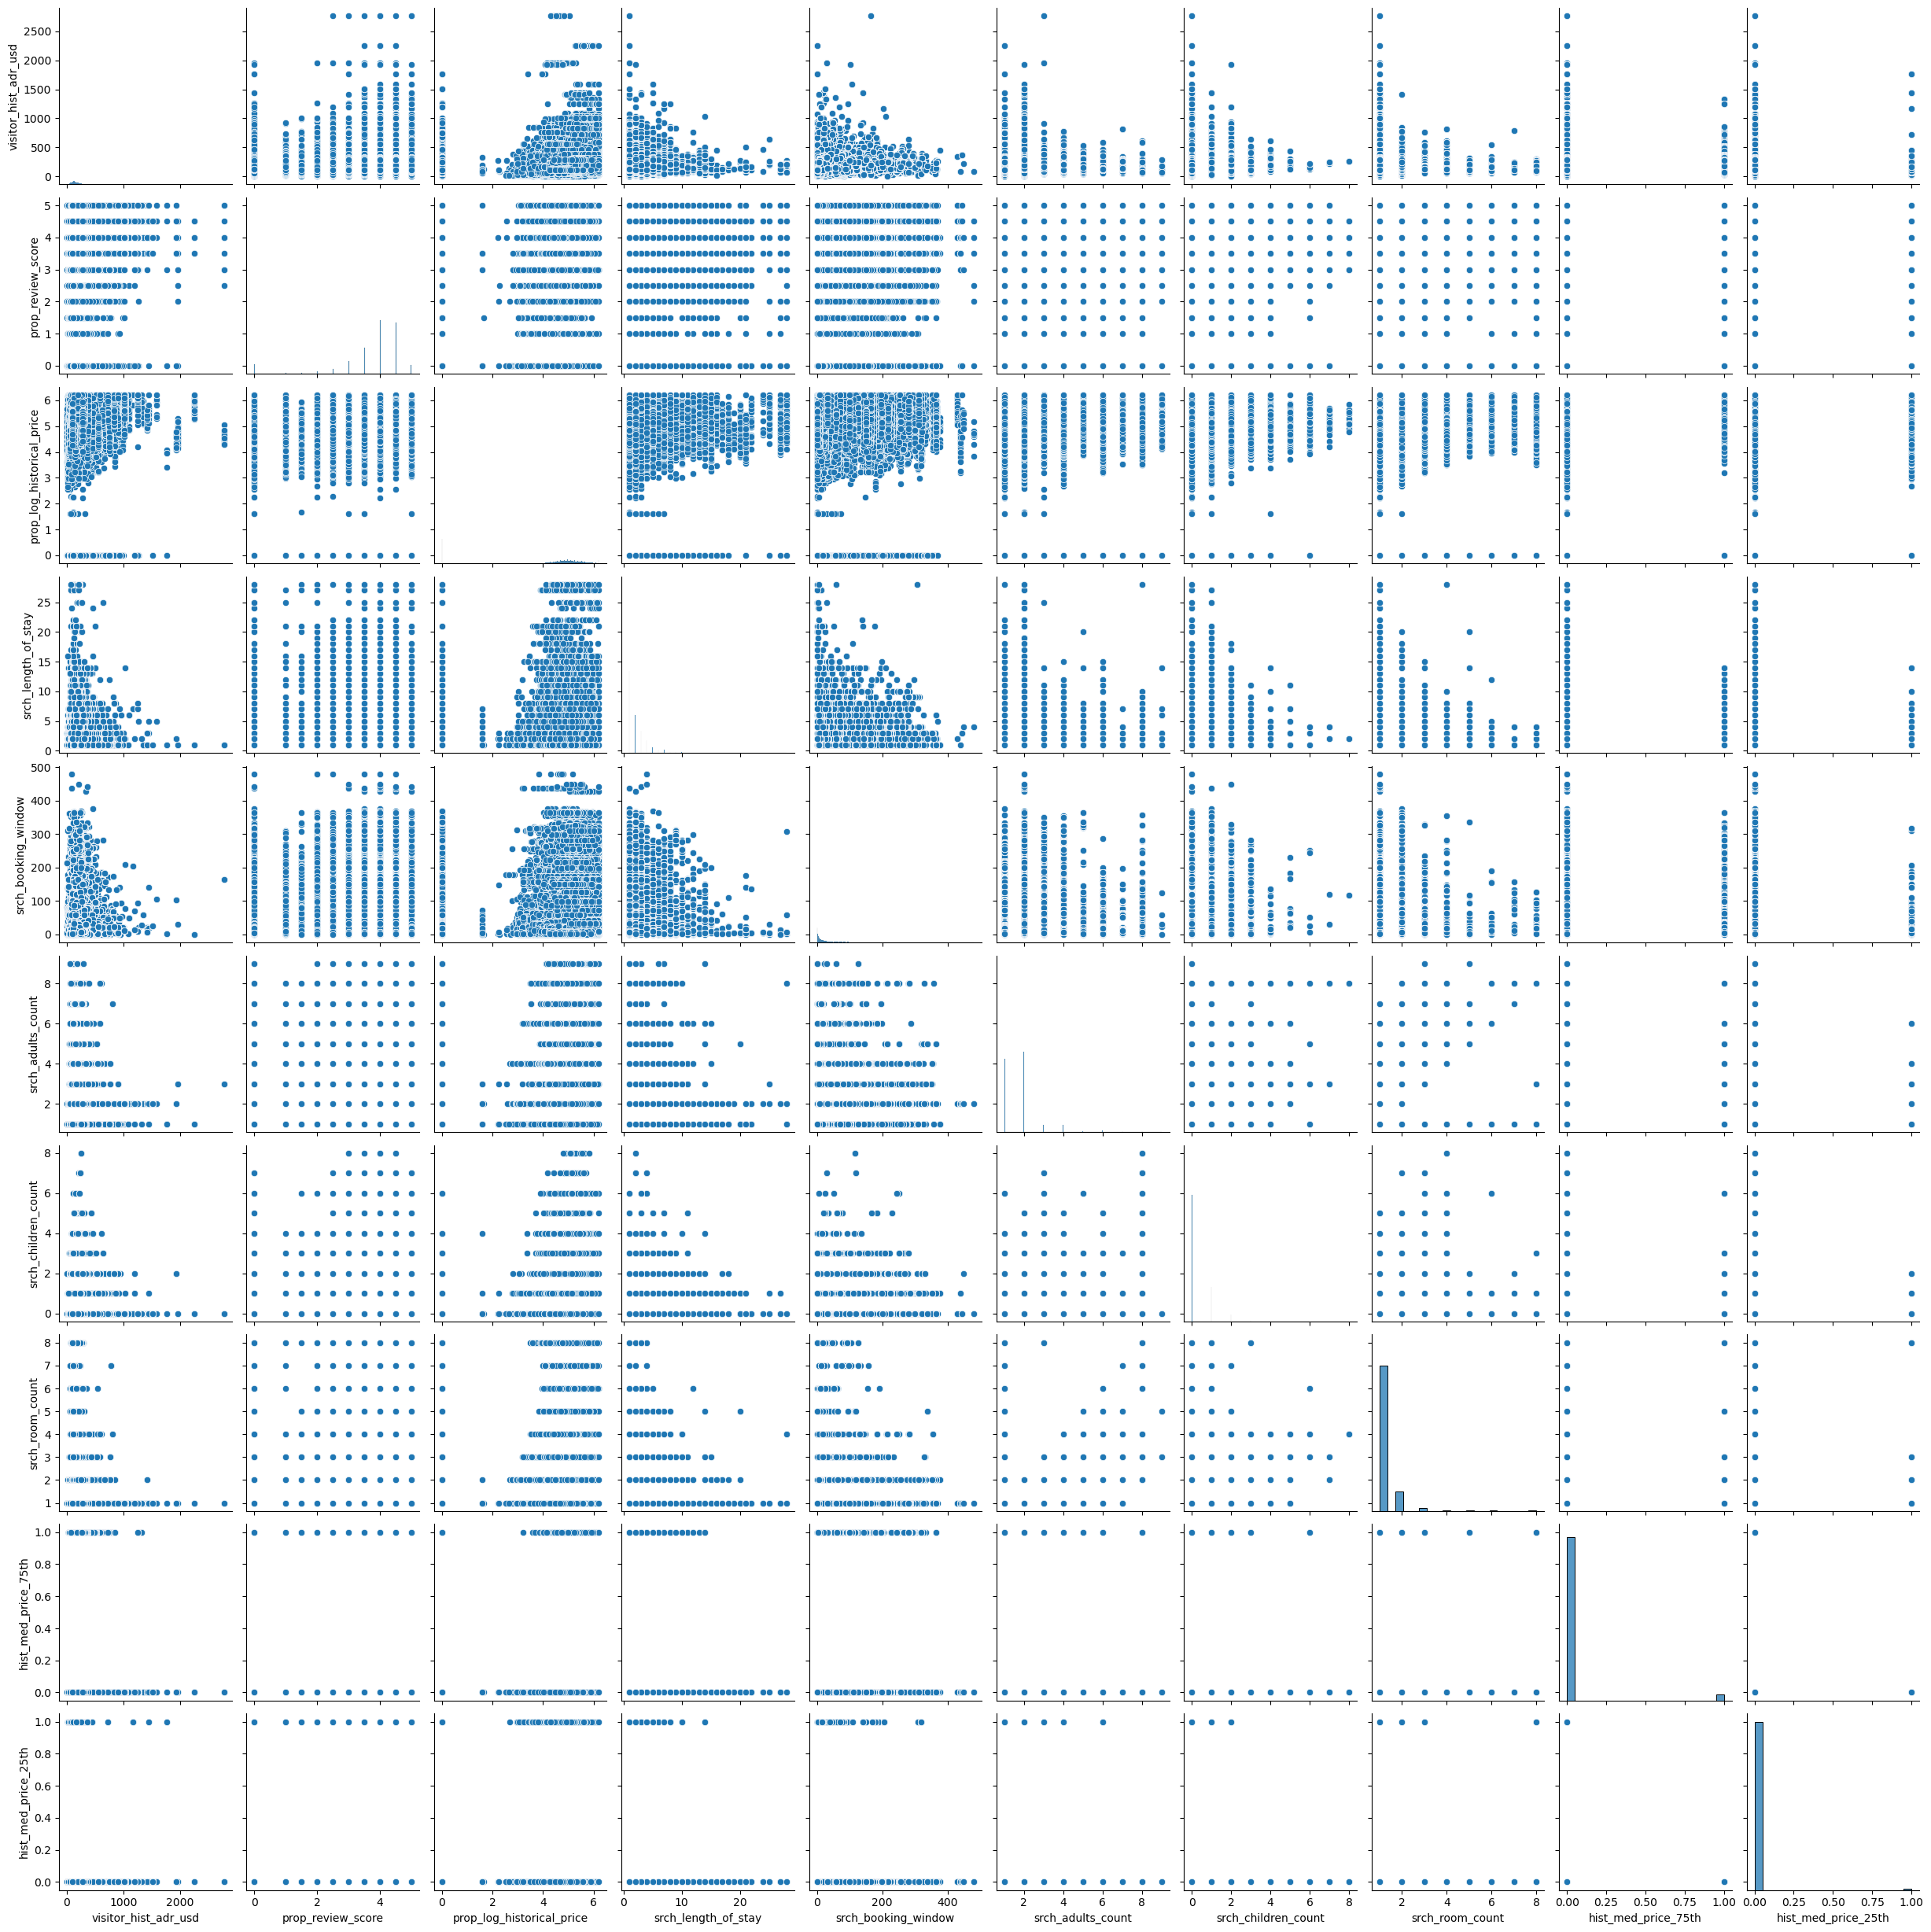

In [79]:
sns.pairplot(train_df[complete_list])

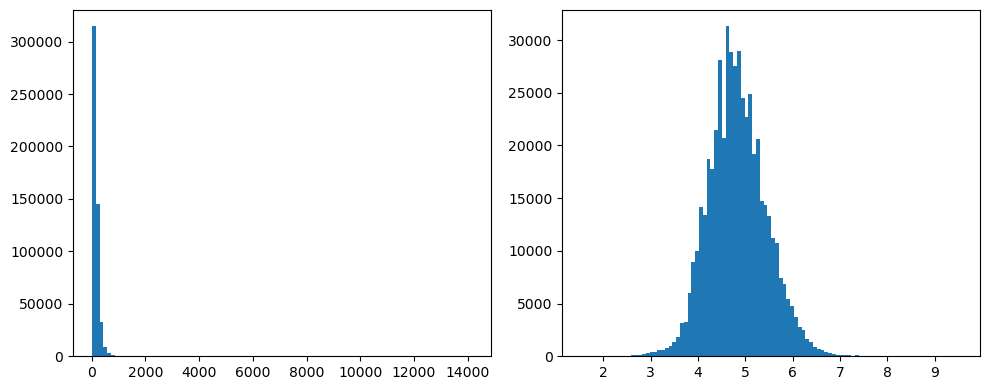

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(train_df["price_usd"], bins = 100)
axs[1].hist(np.log(train_df["price_usd"]), bins = 100)

plt.tight_layout()
plt.show()

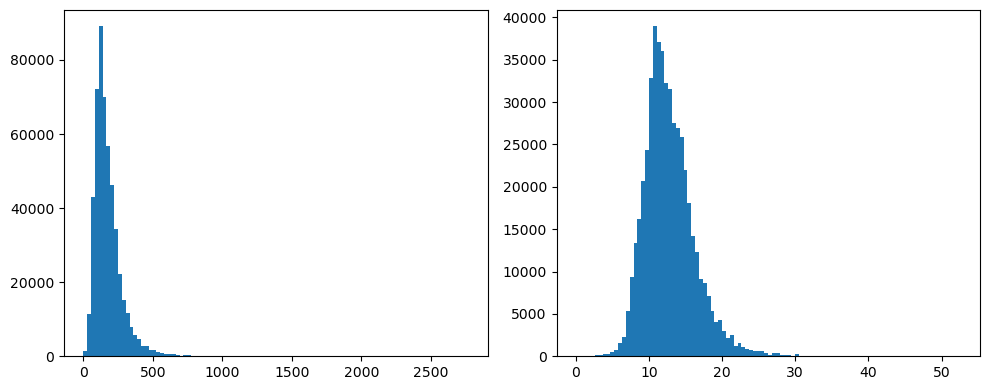

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(train_df["visitor_hist_adr_usd"], bins = 100)
axs[1].hist(np.sqrt(train_df["visitor_hist_adr_usd"]), bins = 100)

plt.tight_layout()
plt.show()

In [85]:
train_df["log_price"] = np.log(train_df["price_usd"])
test_df["log_price"] = np.log(test_df["price_usd"])
train_df["sqrtvisitor_hist_adr"] = np.sqrt(train_df["visitor_hist_adr_usd"])
test_df["sqrtvisitor_hist_adr"] = np.log(test_df["visitor_hist_adr_usd"])

list_transformed = ['sqrtvisitor_hist_adr', 'prop_review_score',
                 'prop_log_historical_price', 'srch_length_of_stay',
                 'srch_booking_window', 'srch_adults_count', 
                 'srch_children_count','srch_room_count', 
                 'hist_med_price_75th', 'hist_med_price_25th']

/Users/yzhao/anaconda3/envs/info2950/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
def fitModel (features):
    X_train = sm.add_constant(train_df[features])
    y_train = train_df["log_price"]
    X_test = sm.add_constant(test_df[features])
    y_test = test_df["log_price"]
    model = sm.OLS(y_train, X_train).fit()
    test_mse = np.sqrt(((y_test - model.predict(X_test)) ** 2).sum())
    return {"Model": model, "Test_MSE": test_mse}

def backwardSelection ():
    best_features = list_transformed.copy()

    # Full model
    best_model_info = fitModel(best_features)
    best_mse = best_model_info["Test_MSE"]

    decreasing_mse = True
    #print (len(best_features))
    while ((decreasing_mse) & (len(best_features) > 1)):
        #print ("here")
        mse_candidates = []

        for feature in best_features:
            temp_features = best_features.copy()
            temp_features.remove(feature)
            #print("Trying", temp_features)
            model_info = fitModel(temp_features)
            mse_candidates.append((model_info["Test_MSE"], feature, model_info))
            #print ("Test MSE for this is", model_info["Test_MSE"])

        mse_candidates.sort()
        #print ("Sorted MSE List", mse_candidates[0], mse_candidates[1])
        candidate_mse, feature_to_remove, candidate_model_info = mse_candidates[0]

        if candidate_mse < best_mse:
            best_mse = candidate_mse
            best_features.remove(feature_to_remove)
            best_model_info = candidate_model_info
        else:
            decreasing_mse = False

    return best_model_info, best_features

In [87]:
tranformed_best_model, t_best_features = backwardSelection()
tranformed_best_model["Model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     9421.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        01:58:59   Log-Likelihood:            -4.2812e+05
No. Observations:              506858   AIC:                         8.563e+05
Df Residuals:                  506848   BIC:                         8.564e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.9643      0.004   1073.769      0.000       3.957       3.972
prop_review_score             0.1467      0.001    205.898      0.000       0.145       0.148
prop_log_historical_price     0.0413      0.000     93.982      0.000       0.040       0.042
srch_length_of_stay           0.0199      0.000     49.356      0.000       0.019       0.021
srch_booking_window           0.0013   1.59e-05     79.749      0.000       0.001       0.001
srch_adults_count             0.0308      0.001     31.977      0.000       0.029       0.033
srch_children_count           0.0515      0.001     38.429      0.000       0.049       0.054
srch_room_count              -0.0176      0.002    -11.592      0.000      -0.021      -0.015
hist_med_price_75th           0.3369      0.004     77.474      0.000       0.328       0.345
hist_med_price_25th          -0.4299      0.010    -40.996      0.000      -0.450      -0.409
==============================================================================
Omnibus:                    25500.050   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40802.057
Skew:                           0.432   Prob(JB):                         0.00
Kurtosis:                       4.088   Cond. No.                         818.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""